### Network Intrusion Detection




In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [72]:
train = pd.read_csv('archive/Train_data.csv')
test = pd.read_csv('archive/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR

Duration: Length of time duration of the connection

Protocol_type: Protocol used in the connection

Service: Destination network service used

Flag: Status of the connection – Normal or Error

Src_bytes: Number of data bytes transferred from source to destination in single connection

Dst_bytes: Number of data bytes transferred from destination to source in single connection

Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0

Wrong_fragment: Total number of wrong fragments in this connection

Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated #### 

#### CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR

Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs

Num_failed_logins: Count of failed login attempts

Logged_in Login Status: 1 if successfully logged in; 0 otherwise

Num_compromised: Number of compromised' ' conditions

Root_shell: 1 if root shell is obtained; 0 otherwise

Su_attempted: 1 ifsu root'' command attempted or used; 0 otherwise

Num_root: Number of root'' accesses or number of operations performed as a root in the connection

Num_file_creations: Number of file creation operations in the connection

Num_shells: Number of shell prompts

Num_access_files: Number of operations on access control files

Num_outbound_cmds: Number of outbound commands in an ftp session

Is_hot_login: 1 if the login belongs to thehot'' list i.e., root or admin; else 0

Is_guest_login: 1 if the login is a guest, 0 otherwise #### TIME RELATED TRAFFIC FEATURES OF EACH NETWORK 

#### CONNECTION VECTOR

Count: Number of connections to the same destination host as the current connection in the past two seconds

Srv_count: Number of connections to the same service (port number) as the current connection in th e past two seconds

Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)

Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)

Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)

Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)

Same_srv_rate: The percentage of connections that were to the same service, among the connections aggregated in count (23)

Diff_srv_rate: The percentage of connections that were to different services, among the connections aggregated in count (23)

Srv_diffhost rate: The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24) 

#### HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR

Dst_host_count: Number of connections having the same destination host IP address

Dst_hostsrv count: Number of connections having the same port number

Dst_host_same srv_rate: The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)

Dst_host_diff srv_rate: The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)

Dst_host_same src_port_rate: The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33)

Dst_host_srv diff_host_rate: The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)

Dst_host_serro r_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)

Dst_host_srv_s error_rate: The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)

Dst_host_rerro r_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)

Dst_host_srv_r error_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

In [73]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [74]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


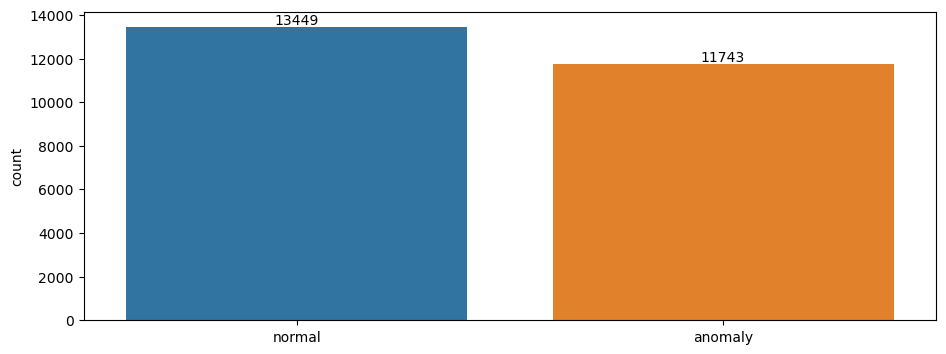

In [75]:
ax = sns.countplot(x=train["class"])
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

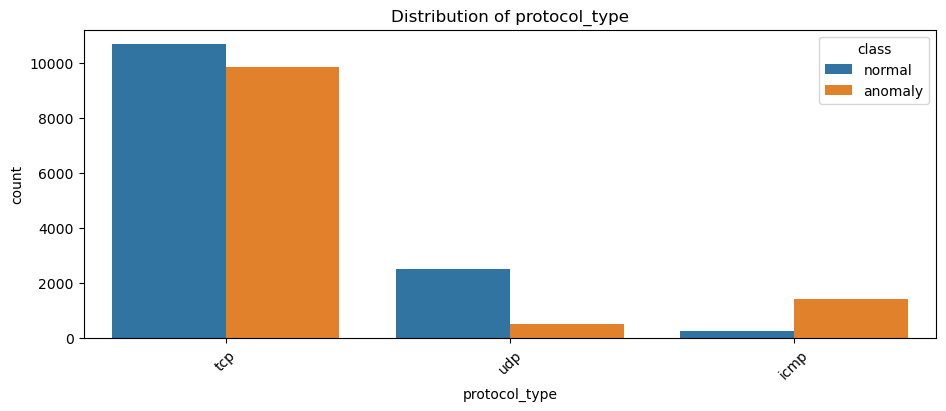

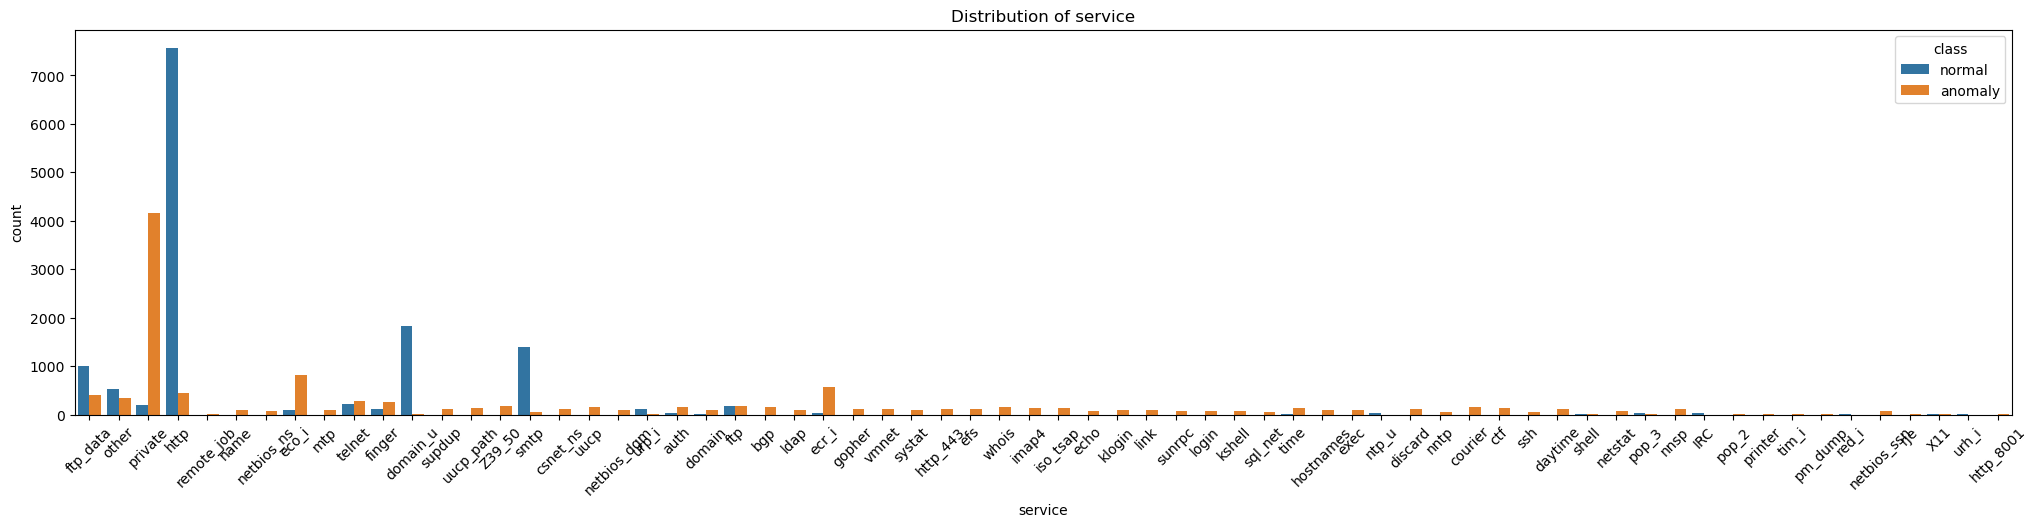

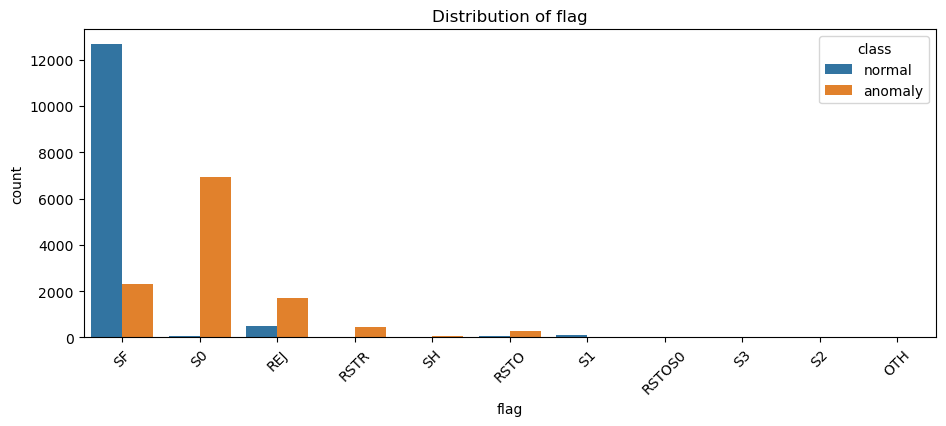

In [76]:
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class')
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


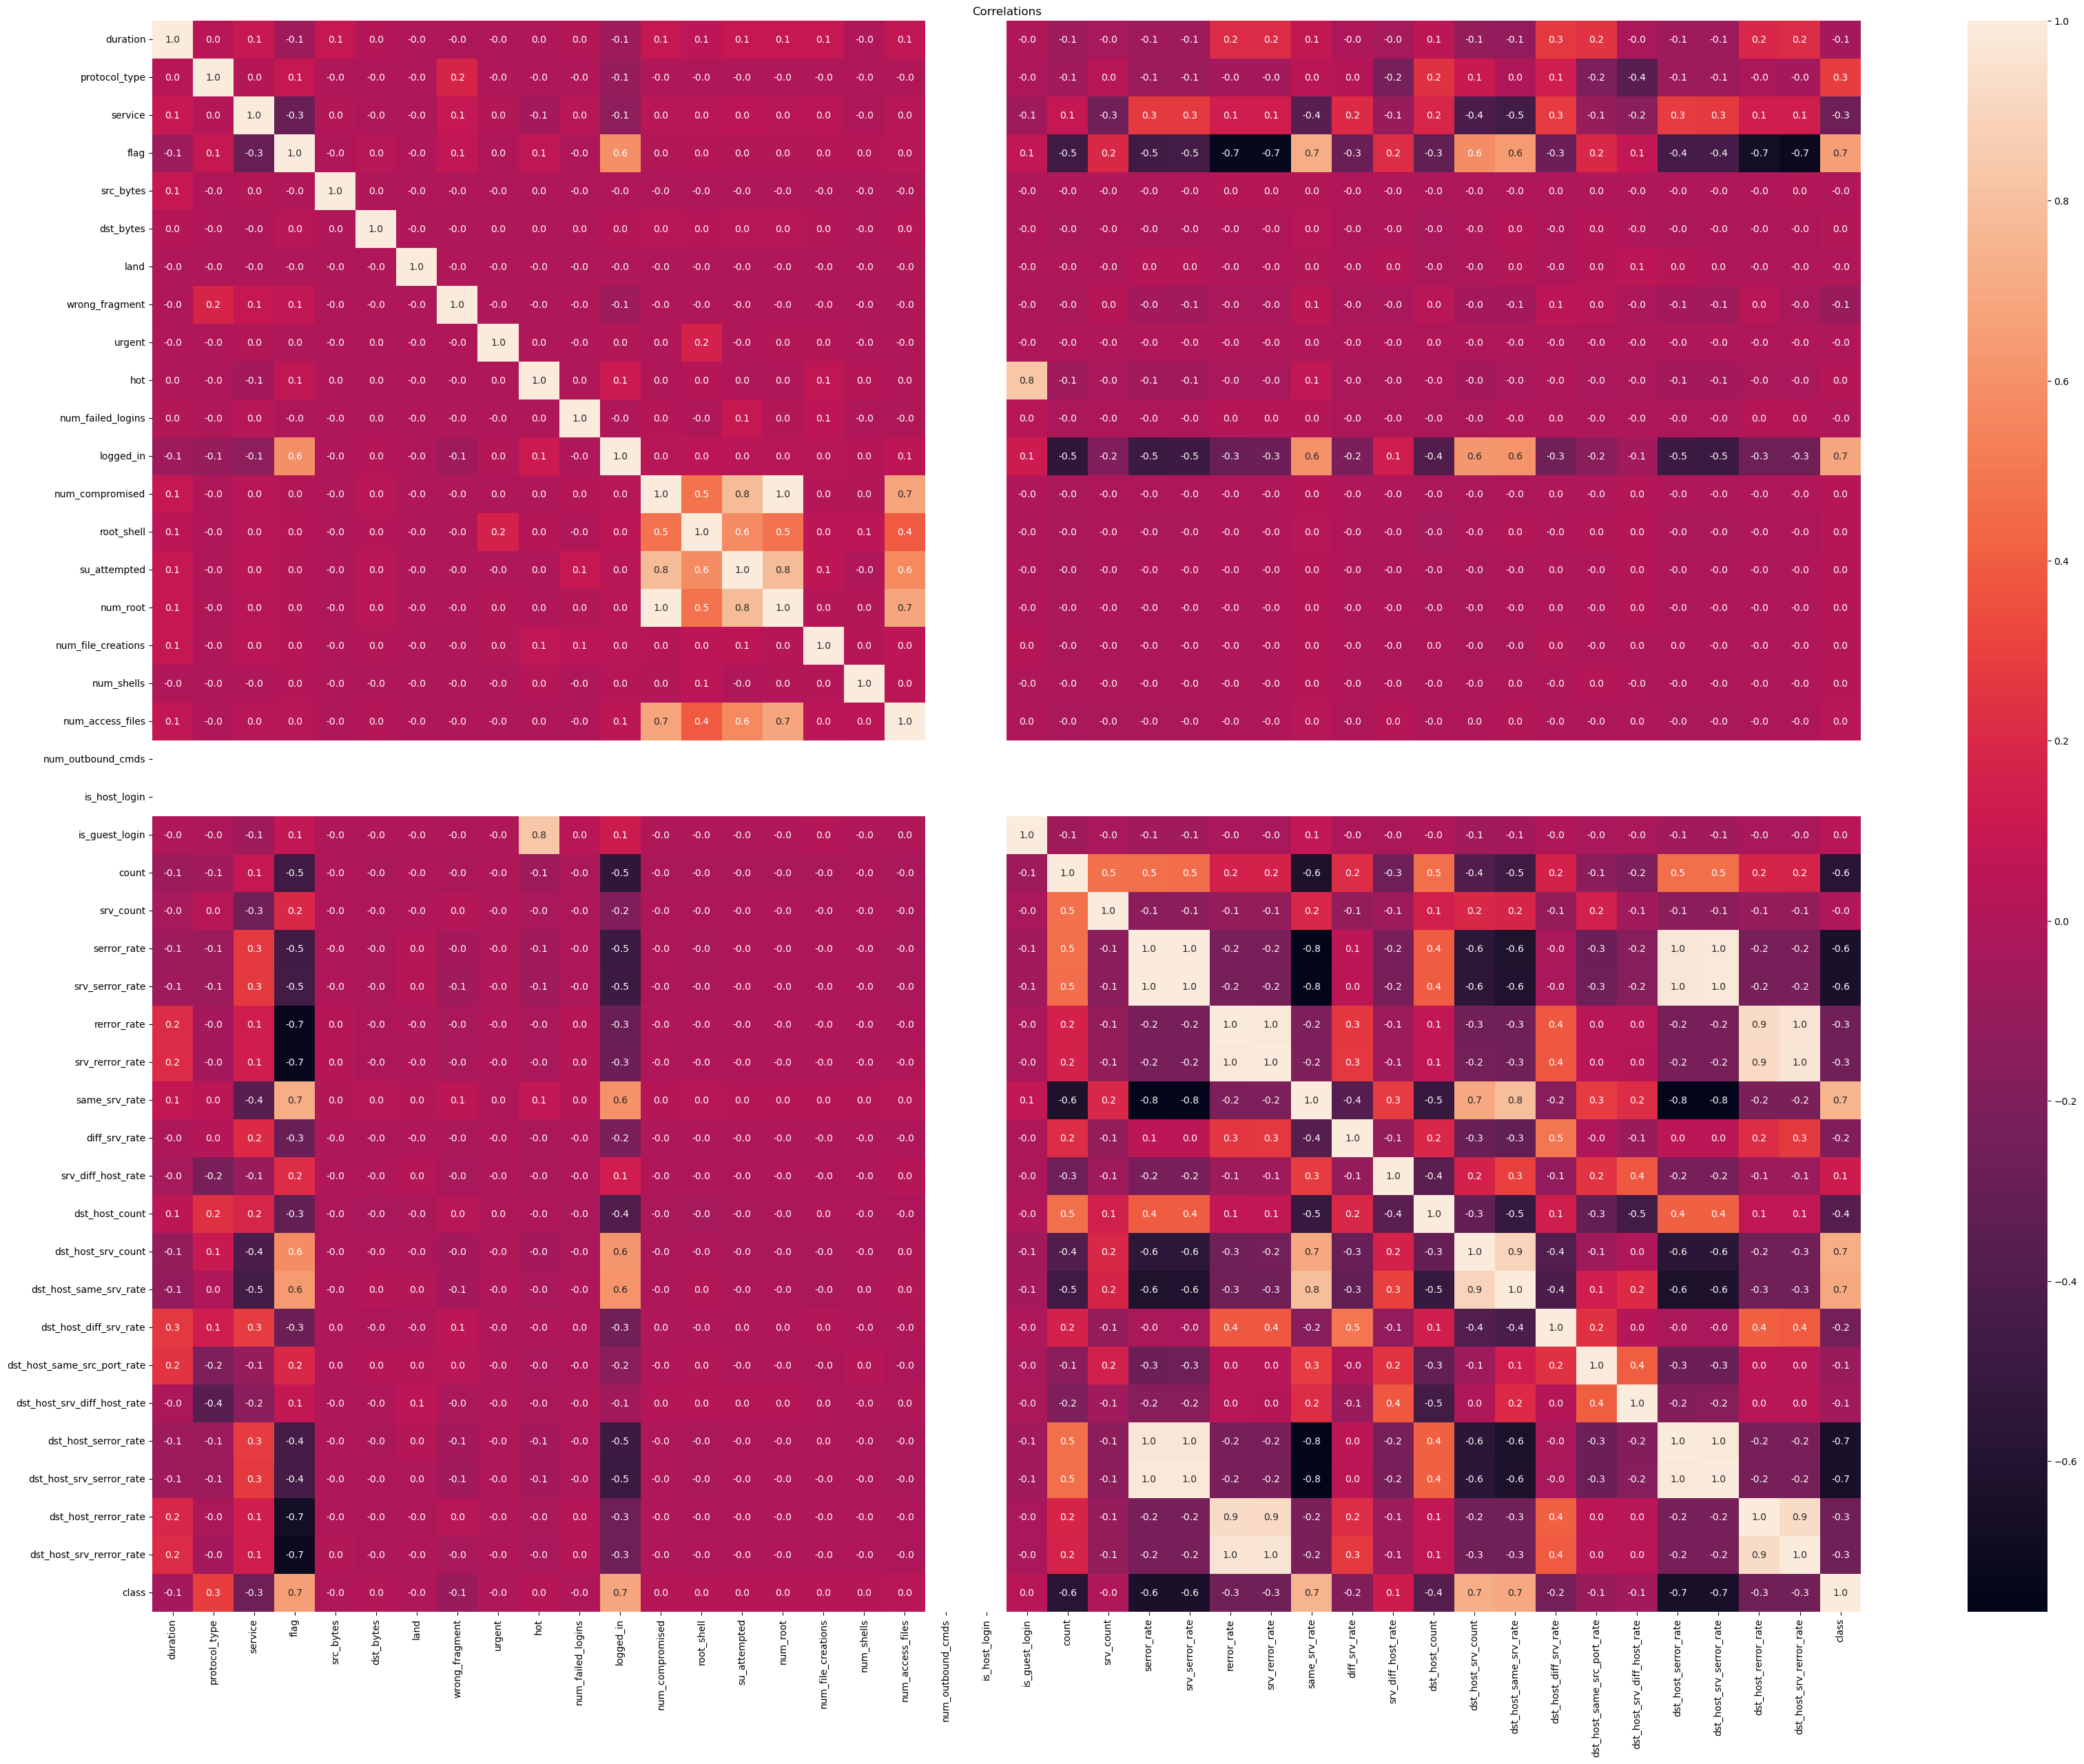

In [78]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f")
plt.title('Correlations')
plt.show()

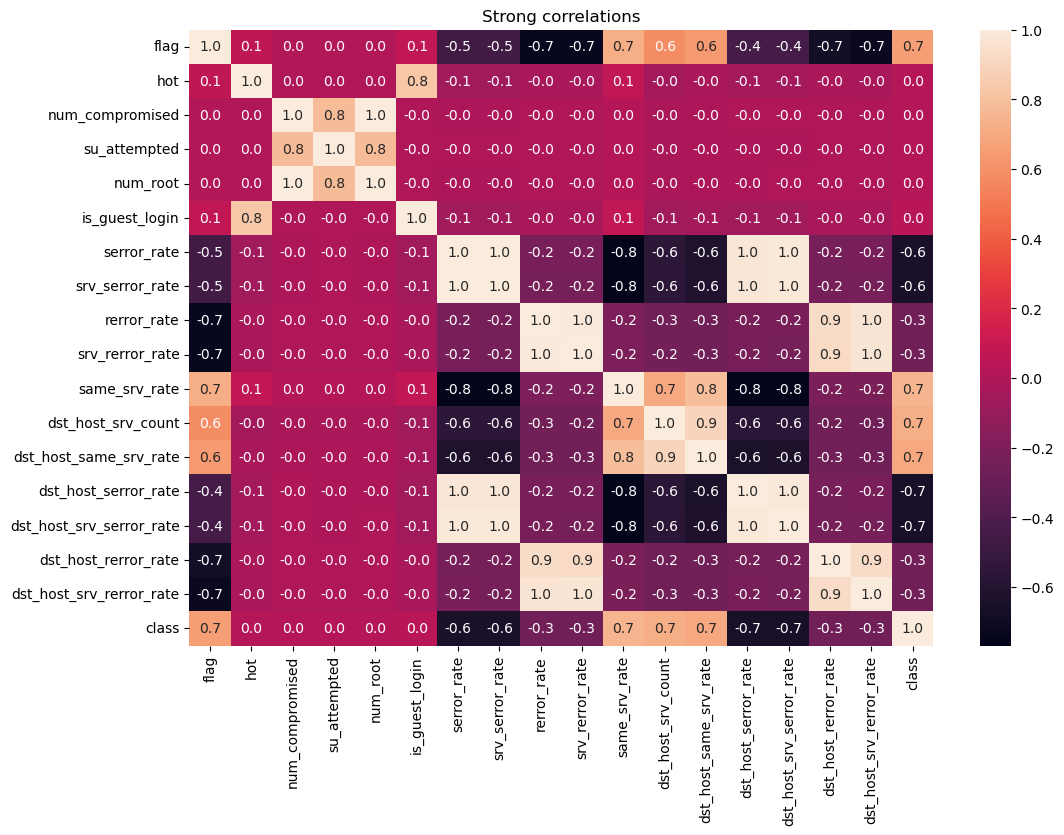

In [79]:
corr_matrix = train.corr()
threshold = 0.7
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f")
plt.title('Strong correlations')
plt.show()

<Axes: xlabel='class', ylabel='count'>

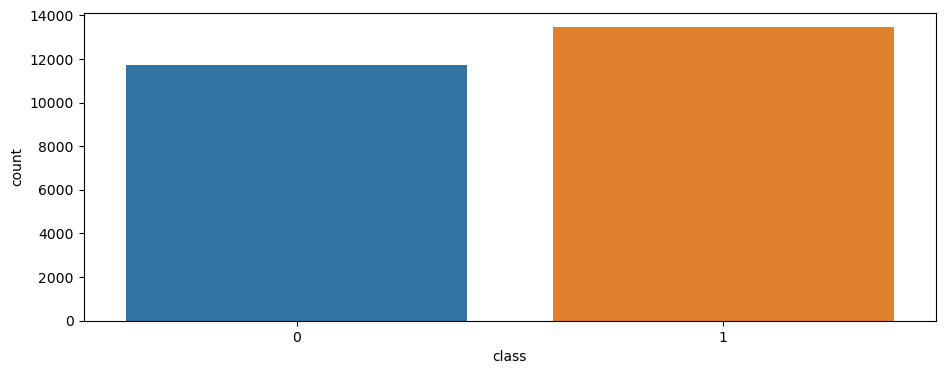

In [80]:
sns.countplot(data=train,x='class')

<Axes: xlabel='protocol_type', ylabel='count'>

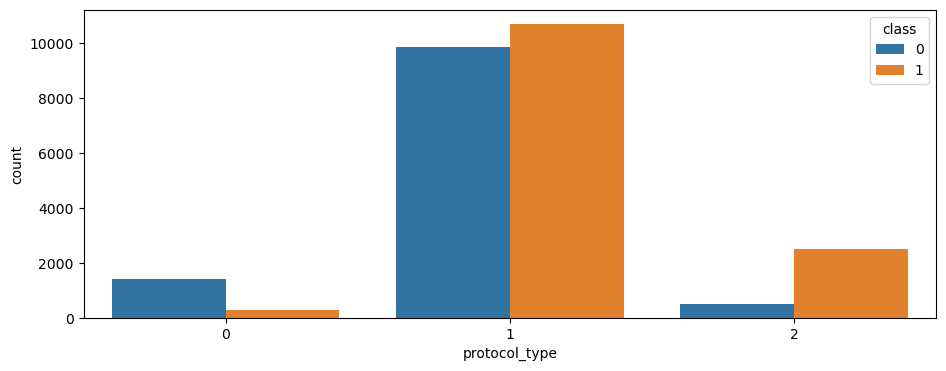

In [81]:
sns.countplot(data=train, x="protocol_type",hue='class')

<Axes: xlabel='flag', ylabel='count'>

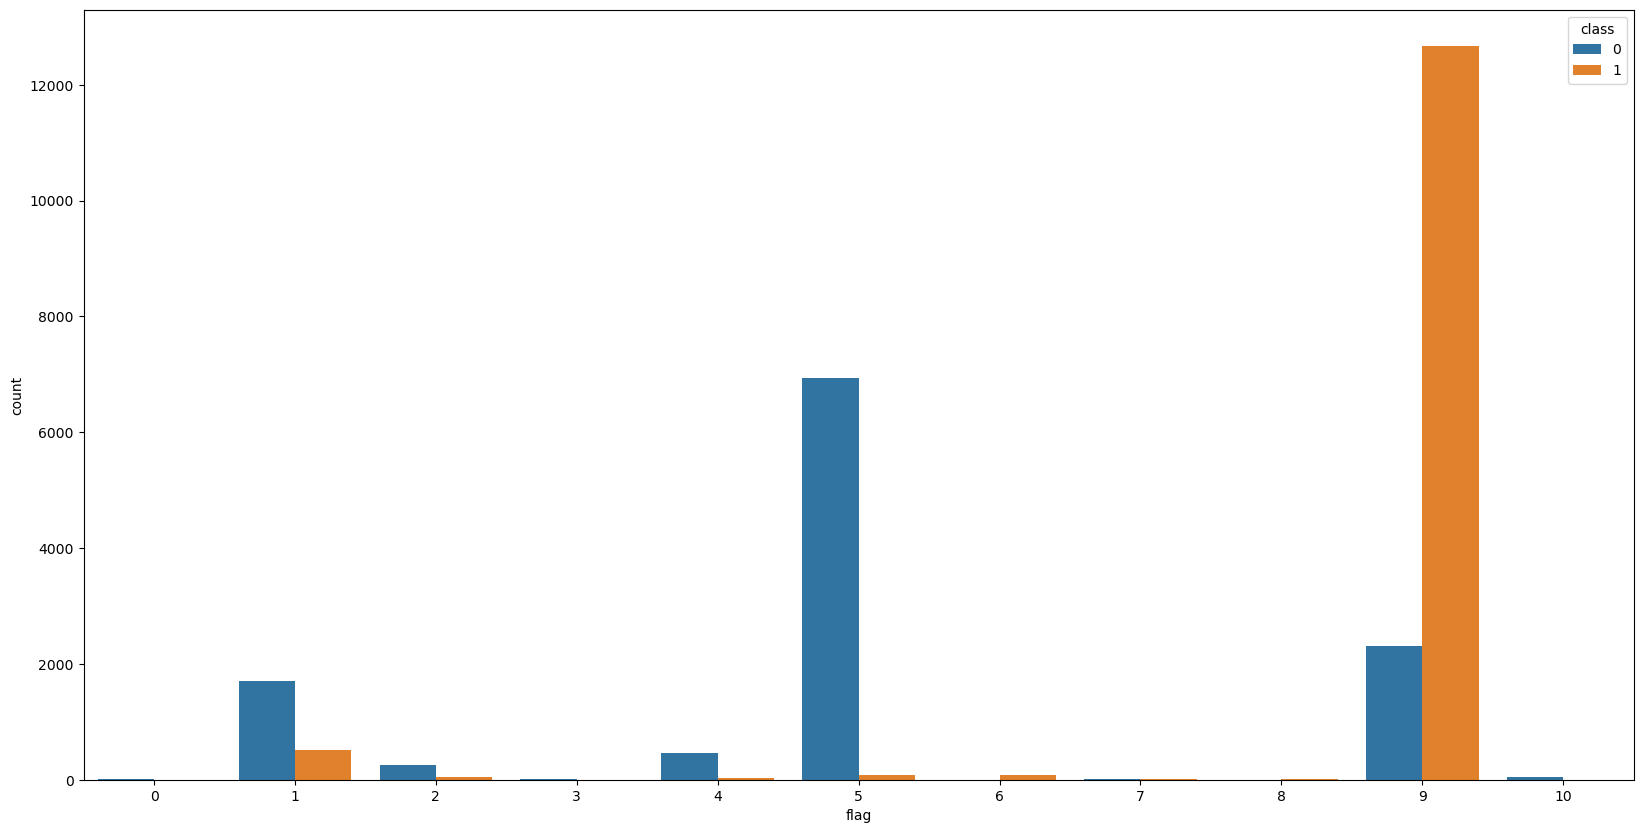

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(data=train,x='flag',hue='class')

In [83]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [84]:
train['class'].value_counts()

1    13449
0    11743
Name: class, dtype: int64

In [85]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [86]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [87]:
X = train.drop(['class'], axis=1)
y = train['class']

In [88]:
scaler = StandardScaler()
train_cols = X.select_dtypes(include=['float64','int64']).columns
test_cols = test.select_dtypes(include=['float64','int64']).columns
scaledtrain = scaler.fit_transform(X.select_dtypes(include=['float64','int64']))
scaledtest = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))
X = pd.DataFrame(scaledtrain, columns = train_cols)
test = pd.DataFrame(scaledtest, columns = test_cols)

In [89]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.126061,-0.645384,0.753021,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,2.215916,0.768925,0.753021,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.126061,1.090360,-0.739924,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.126061,-0.452524,0.753021,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.126061,-0.452524,0.753021,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [90]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155534,-0.176303,0.933964,-1.829954,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
1,-0.155534,-0.176303,0.933964,-1.829954,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
2,-0.154113,-0.176303,-0.882254,0.662256,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483
3,-0.155534,-2.695050,-1.301382,0.662256,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483
4,-0.154823,-0.176303,1.632509,-1.518428,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682


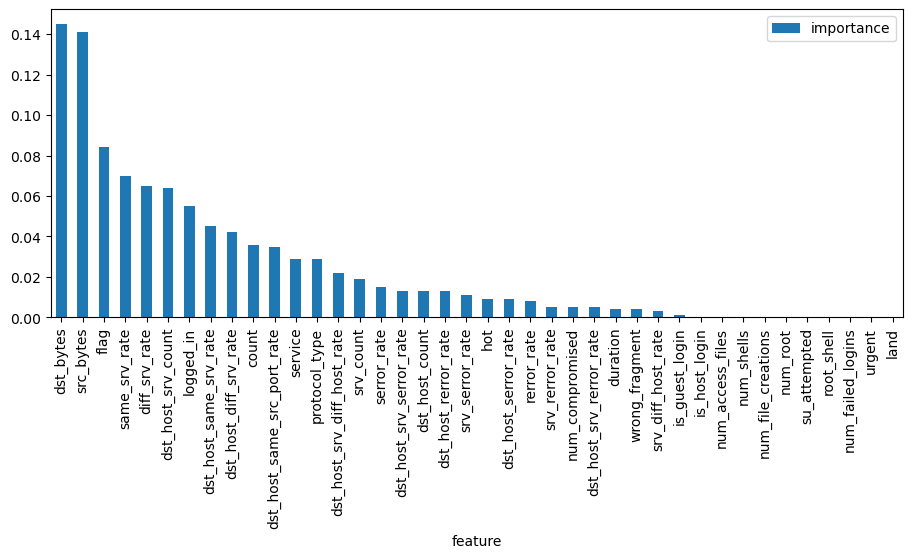

In [91]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X, y)
score = np.round(randomForestClassifier.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [92]:
#Consider 15 most important features
importances = importances.head(15)
feature_list = list(importances.index.values)
feature_list

['dst_bytes',
 'src_bytes',
 'flag',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'logged_in',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_same_src_port_rate',
 'service',
 'protocol_type',
 'dst_host_srv_diff_host_rate',
 'srv_count']

In [93]:
X = X[feature_list]

In [94]:
X.head()

,dst_bytes,src_bytes,flag,same_srv_rate,diff_srv_rate,dst_host_srv_count,logged_in,dst_host_same_srv_rate,dst_host_diff_srv_rate,count,dst_host_same_src_port_rate,service,protocol_type,dst_host_srv_diff_host_rate,srv_count
0,-0.039310,-0.009889,0.753021,0.772109,-0.349282,-0.813985,-0.807626,-0.779157,-0.280673,-0.720244,0.073120,-0.645384,-0.126061,-0.287993,-0.354628
1,-0.039310,-0.010032,0.753021,-1.320567,0.490836,-1.030895,-0.807626,-1.157831,2.764403,-0.624317,2.375620,0.768925,2.215916,-0.287993,-0.368427
2,-0.039310,-0.010093,-0.739924,-1.388806,0.042773,-0.804947,-0.807626,-0.935081,-0.173828,0.334947,-0.478183,1.090360,-0.126061,-0.287993,-0.299430
3,0.052473,-0.009996,0.753021,0.772109,-0.349282,1.264742,1.238197,1.069663,-0.440940,-0.694082,-0.380894,-0.452524,-0.126061,0.073759,-0.313230
4,-0.034582,-0.010010,0.753021,0.772109,-0.349282,1.264742,1.238197,1.069663,-0.440940,-0.476067,-0.478183,-0.452524,-0.126061,-0.287993,0.059355


In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.70, random_state=2)

In [97]:
beroullinaivebayes=BernoulliNB()
decisiontreeclassifier=DecisionTreeClassifier()
randomforestclassifier=RandomForestClassifier()
baggingclassifier=BaggingClassifier()
xgbclassifier=XGBClassifier()
adaboostclassifier=AdaBoostClassifier()   
classifiers = [beroullinaivebayes,decisiontreeclassifier,randomforestclassifier,baggingclassifier,xgbclassifier,adaboostclassifier]
classifiernames = ['Bernoulli Naive Bayes','Decision Tree Classifier','Random Forest Classifier','Bagging Classifier','XGB Classifier','AdaBoostClassifier']
Train_acc=[]
Train_precsc=[]
Train_fsc=[]
Train_Recall=[]
Test_acc=[]
Test_precsc=[]
Test_fsc=[]
Test_Recall=[]
Test_AUC=[]   
classifiercompare = pd.DataFrame(index = classifiernames)
   
for classifier in classifiers:   
    classifier.fit(X_train,Y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    Train_acc.append(accuracy_score(Y_train,y_train_pred))
    Train_precsc.append(precision_score(Y_train,y_train_pred))
    Train_fsc.append(f1_score(Y_train,y_train_pred))
    Train_Recall.append(recall_score(Y_train,y_train_pred,average='micro'))     
    Test_acc.append(accuracy_score(Y_test,y_test_pred))
    Test_precsc.append(precision_score(Y_test,y_test_pred))
    Test_fsc.append(f1_score(Y_test,y_test_pred))
    Test_Recall.append(recall_score(Y_test,y_test_pred,average='micro'))
    Test_AUC.append(roc_auc_score(Y_test,y_test_pred))

    
classifiercompare['Train Accuracy'] = Train_acc
classifiercompare['Train Precision'] = Train_precsc
classifiercompare['Train F1Score']= Train_fsc
classifiercompare['Train Recall']= Train_Recall    
classifiercompare['Test Accuracy'] = Test_acc
classifiercompare['Test Precision'] = Test_precsc
classifiercompare['Test F1Score']= Test_fsc
classifiercompare['Test Recall']= Test_Recall
classifiercompare['Test AUC Score']= Test_AUC

classifiercompare.sort_values('Test Accuracy', ascending=False)

,Train Accuracy,Train Precision,Train F1Score,Train Recall,Test Accuracy,Test Precision,Test F1Score,Test Recall,Test AUC Score
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,0.996163,0.996062,0.996430,0.996163,0.996112
XGB Classifier,1.000000,1.000000,1.000000,1.000000,0.996031,0.996061,0.996306,0.996031,0.995989
Bagging Classifier,0.999376,0.999680,0.999414,0.999376,0.994708,0.996542,0.995067,0.994708,0.994797
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.993252,0.995305,0.993709,0.993252,0.993343
AdaBoostClassifier,0.984632,0.983252,0.985603,0.984632,0.986107,0.986470,0.987077,0.986107,0.985981
Bernoulli Naive Bayes,0.888454,0.867717,0.899030,0.888454,0.889256,0.873811,0.900012,0.889256,0.886158
